In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
df=pd.DataFrame(iris.data)
df.rename(columns = {0:'SepalLength'}, inplace = True)

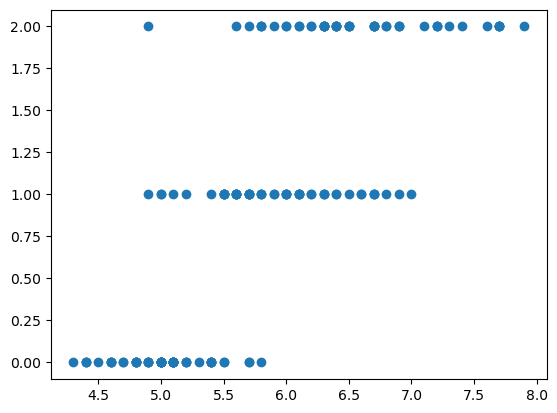

In [46]:
plt.scatter(df['SepalLength'],iris.target)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)


In [48]:
len(X_train)

120

In [49]:
len(X_test)

30

In [51]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 2, 0])

In [53]:
y_test

array([2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 2, 0])

In [65]:
model.score(X_test,y_test)

0.9666666666666667

In [77]:
model.predict([[5.1, 3.8, 1.9, 0.4]])

array([0])

In [78]:
y_pred=model.predict(X_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 10]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(95.72222222222221, 0.5, 'Truth')

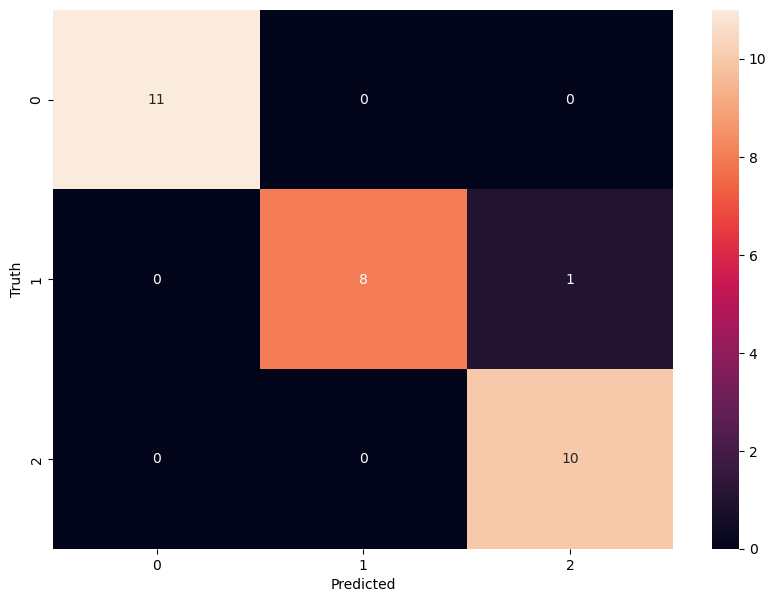

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')